In [1]:
import pandas as pd

# Load data
xls = pd.ExcelFile("E:\\数学建模国赛2023选题\\C题\\第三题数据表格进一步数据处理27商品.xlsx")
df=pd.read_excel(xls)
df

,Unnamed: 0,销售日期,销量(千克),销售单价(元/千克),是否打折销售,批发价格(元/千克),损耗率(%),单品名称,陈列量(千克)
0,0,2023-06-24,1.000,2.8,否,1.51,9.43,小皱皮(份),1.104118
1,1,2023-06-24,0.379,4.0,否,2.41,13.62,竹叶菜,0.438759
2,2,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜,0.619784
3,3,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜,0.619784
4,4,2023-06-24,1.000,4.5,否,3.32,9.43,云南生菜(份),1.104118
...,...,...,...,...,...,...,...,...,...
3000,3494,2023-06-30,0.117,24.0,否,15.60,10.80,西峡花菇(1),0.131166
3001,3496,2023-06-30,0.358,11.2,否,7.59,9.26,西兰花,0.394534
3002,3497,2023-06-30,0.284,24.0,否,15.60,10.80,西峡花菇(1),0.318386
3003,3499,2023-06-30,0.125,24.0,否,15.60,10.80,西峡花菇(1),0.140135


In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df

,销售日期,销量(千克),销售单价(元/千克),是否打折销售,批发价格(元/千克),损耗率(%),单品名称,陈列量(千克)
0,2023-06-24,1.000,2.8,否,1.51,9.43,小皱皮(份),1.104118
1,2023-06-24,0.379,4.0,否,2.41,13.62,竹叶菜,0.438759
2,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜,0.619784
3,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜,0.619784
4,2023-06-24,1.000,4.5,否,3.32,9.43,云南生菜(份),1.104118
...,...,...,...,...,...,...,...,...
3000,2023-06-30,0.117,24.0,否,15.60,10.80,西峡花菇(1),0.131166
3001,2023-06-30,0.358,11.2,否,7.59,9.26,西兰花,0.394534
3002,2023-06-30,0.284,24.0,否,15.60,10.80,西峡花菇(1),0.318386
3003,2023-06-30,0.125,24.0,否,15.60,10.80,西峡花菇(1),0.140135


In [3]:
# Drop the '陈列量(千克)' and '损耗率(%)' columns from the DataFrame
df.drop(columns=['陈列量(千克)'], inplace=True, errors='ignore')

# Show the first few rows of the DataFrame after dropping the specified columns
df


,销售日期,销量(千克),销售单价(元/千克),是否打折销售,批发价格(元/千克),损耗率(%),单品名称
0,2023-06-24,1.000,2.8,否,1.51,9.43,小皱皮(份)
1,2023-06-24,0.379,4.0,否,2.41,13.62,竹叶菜
2,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜
3,2023-06-24,0.505,4.0,否,2.31,18.52,苋菜
4,2023-06-24,1.000,4.5,否,3.32,9.43,云南生菜(份)
...,...,...,...,...,...,...,...
3000,2023-06-30,0.117,24.0,否,15.60,10.80,西峡花菇(1)
3001,2023-06-30,0.358,11.2,否,7.59,9.26,西兰花
3002,2023-06-30,0.284,24.0,否,15.60,10.80,西峡花菇(1)
3003,2023-06-30,0.125,24.0,否,15.60,10.80,西峡花菇(1)


In [4]:
# Group the data by '单品名称' and calculate the proportion of discounted sales for each product
grouped_by_product = df.groupby('单品名称')['是否打折销售'].value_counts(normalize=True).unstack().fillna(0)
grouped_by_product['打折比例(%)'] = grouped_by_product['是'] * 100

# Sort the DataFrame by the discount proportion
grouped_by_product_sorted = grouped_by_product.sort_values('打折比例(%)', ascending=False)

# Show the products with the highest discount proportions
grouped_by_product_sorted

是否打折销售,否,是,打折比例(%)
单品名称,,,
鲜木耳(份),0.000000,1.000000,100.000000
洪湖藕带,0.441558,0.558442,55.844156
高瓜(1),0.473684,0.526316,52.631579
菠菜(份),0.510204,0.489796,48.979592
木耳菜,0.679245,0.320755,32.075472
净藕(1),0.711111,0.288889,28.888889
海鲜菇(包),0.741935,0.258065,25.806452
双孢菇(盒),0.757143,0.242857,24.285714
云南油麦菜(份),0.765101,0.234899,23.489933


In [5]:
"""
打折比例的信息有多方面的意义，特别是对于7月1日的单品补货量和定价策略：

定价策略：
调整定价：如果某个商品有很高的打折比例，这可能意味着该商品不容易以正常价格出售。为了提高销售额并减少库存，商家可能需要重新考虑该商品的定价策略。

限时促销和捆绑销售：具有高打折比例的商品可以用作限时促销或捆绑销售的一部分，以吸引更多客户。

补货策略：
降低补货量：如果一个商品经常需要打折才能卖出，那么最好减少对这种商品的补货量，以减少库存和潜在的损失。

高峰期调整：了解哪些商品更容易打折有助于在需求高峰期（如节假日或特殊活动期间）做出更加合理的补货决策。

存储和展示：对于打折比例高的商品，可能需要重新考虑其在商店里的位置和陈列方式，以提高其可见性和吸引力。
"""

'\n打折比例的信息有多方面的意义，特别是对于7月1日的单品补货量和定价策略：\n\n定价策略：\n调整定价：如果某个商品有很高的打折比例，这可能意味着该商品不容易以正常价格出售。为了提高销售额并减少库存，商家可能需要重新考虑该商品的定价策略。\n\n限时促销和捆绑销售：具有高打折比例的商品可以用作限时促销或捆绑销售的一部分，以吸引更多客户。\n\n补货策略：\n降低补货量：如果一个商品经常需要打折才能卖出，那么最好减少对这种商品的补货量，以减少库存和潜在的损失。\n\n高峰期调整：了解哪些商品更容易打折有助于在需求高峰期（如节假日或特殊活动期间）做出更加合理的补货决策。\n\n存储和展示：对于打折比例高的商品，可能需要重新考虑其在商店里的位置和陈列方式，以提高其可见性和吸引力。\n'

In [6]:
# Combine the code snippets into one and execute to get the final DataFrame
# Group the data by '销售日期' and '单品名称', then sum the sales quantity to get daily total sales for each product
daily_total_sales = df.groupby(['销售日期', '单品名称'])['销量(千克)'].sum().reset_index()

# Calculate the weighted average expected sale price for each product each day
df['加权销售单价'] = df['销量(千克)'] * df['销售单价(元/千克)']
daily_weighted_avg_price = df.groupby(['销售日期', '单品名称']).apply(lambda x: (x['加权销售单价'].sum() / x['销量(千克)'].sum())).reset_index(name='加权期望销售单价(元/千克)')

# Merge the daily total sales and daily weighted average price, and retain the wholesale price
merged_daily_stats = daily_total_sales.merge(daily_weighted_avg_price, on=['销售日期', '单品名称'])
merged_daily_stats = merged_daily_stats.merge(df[['销售日期', '单品名称', '批发价格(元/千克)','损耗率(%)']].drop_duplicates(), on=['销售日期', '单品名称'])

# Show the final DataFrame
merged_daily_stats



,销售日期,单品名称,销量(千克),加权期望销售单价(元/千克),批发价格(元/千克),损耗率(%)
0,2023-06-24,云南油麦菜(份),26.000,4.361538,2.94,9.43
1,2023-06-24,云南生菜(份),58.000,4.282759,3.32,9.43
2,2023-06-24,净藕(1),7.656,15.280042,11.00,5.54
3,2023-06-24,双孢菇(盒),12.000,5.133333,3.39,0.20
4,2023-06-24,奶白菜,6.609,5.200000,2.40,15.68
...,...,...,...,...,...,...
172,2023-06-30,螺丝椒(份),10.000,5.660000,4.29,9.43
173,2023-06-30,西兰花,16.900,11.200000,7.59,9.26
174,2023-06-30,西峡花菇(1),6.572,24.000000,15.60,10.80
175,2023-06-30,金针菇(盒),13.000,1.938462,1.45,0.45


In [7]:
#merged_daily_stats.to_excel("E:\\数学建模国赛2023选题\\C题\\第三题_销量_加权期望销售单价_批发价格_损耗率.xlsx", index=True)

In [8]:
# Calculate the daily replenishment quantity based on sales and loss rate
# Formula: Replenishment Quantity = Sales / (1 - Loss Rate/100)
# This formula assumes that the loss rate is given as a percentage.
merged_daily_stats['每日补货量(千克)'] = merged_daily_stats['销量(千克)'] / (1 - merged_daily_stats['损耗率(%)'] / 100)

# Group by date and product to summarize the daily replenishment quantity for each product
daily_replenishment = merged_daily_stats.groupby(['销售日期', '单品名称'])['每日补货量(千克)'].sum().reset_index()

# Show the first few rows of the daily replenishment DataFrame
daily_replenishment


,销售日期,单品名称,每日补货量(千克)
0,2023-06-24,云南油麦菜(份),28.707077
1,2023-06-24,云南生菜(份),64.038865
2,2023-06-24,净藕(1),8.105018
3,2023-06-24,双孢菇(盒),12.024048
4,2023-06-24,奶白菜,7.837998
...,...,...,...
172,2023-06-30,螺丝椒(份),11.041184
173,2023-06-30,西兰花,18.624642
174,2023-06-30,西峡花菇(1),7.367713
175,2023-06-30,金针菇(盒),13.058764


In [9]:
merged_daily_stats

,销售日期,单品名称,销量(千克),加权期望销售单价(元/千克),批发价格(元/千克),损耗率(%),每日补货量(千克)
0,2023-06-24,云南油麦菜(份),26.000,4.361538,2.94,9.43,28.707077
1,2023-06-24,云南生菜(份),58.000,4.282759,3.32,9.43,64.038865
2,2023-06-24,净藕(1),7.656,15.280042,11.00,5.54,8.105018
3,2023-06-24,双孢菇(盒),12.000,5.133333,3.39,0.20,12.024048
4,2023-06-24,奶白菜,6.609,5.200000,2.40,15.68,7.837998
...,...,...,...,...,...,...,...
172,2023-06-30,螺丝椒(份),10.000,5.660000,4.29,9.43,11.041184
173,2023-06-30,西兰花,16.900,11.200000,7.59,9.26,18.624642
174,2023-06-30,西峡花菇(1),6.572,24.000000,15.60,10.80,7.367713
175,2023-06-30,金针菇(盒),13.000,1.938462,1.45,0.45,13.058764


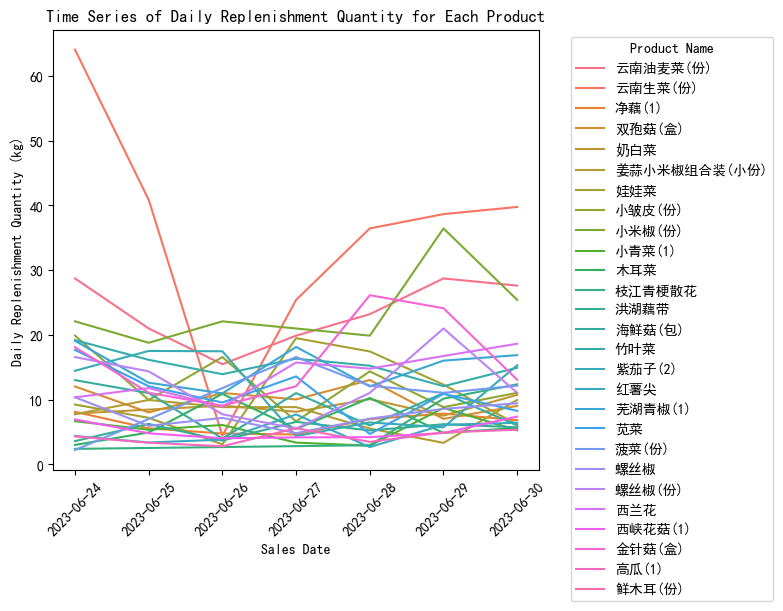

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the time series relationship between each product's daily replenishment quantity and the sales date
plt.figure(figsize=(8, 6))
sns.lineplot(data=daily_replenishment, x='销售日期', y='每日补货量(千克)', hue='单品名称')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('Time Series of Daily Replenishment Quantity for Each Product')
plt.xlabel('Sales Date')
plt.ylabel('Daily Replenishment Quantity (kg)')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


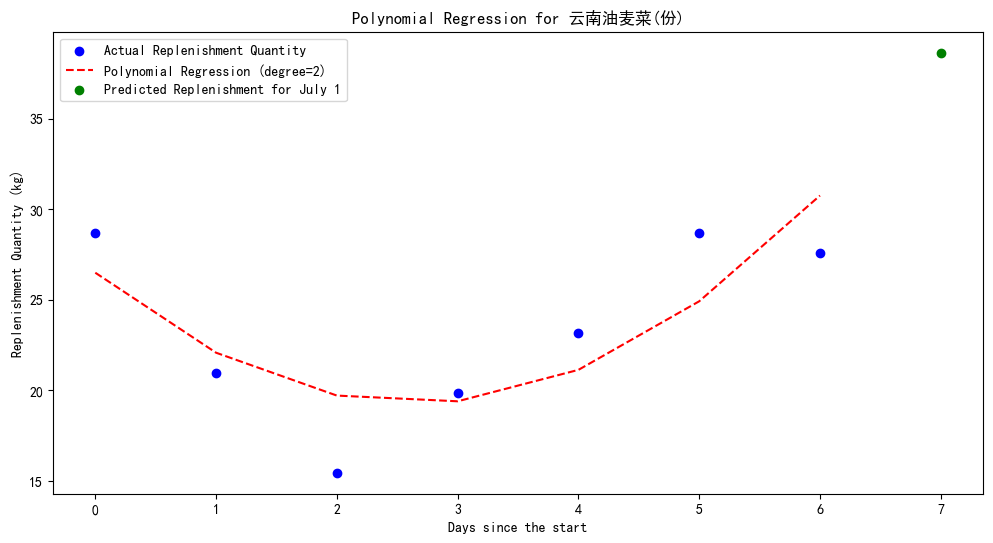

array([38.64414265])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# Select an example product for demonstration
example_product = '云南油麦菜(份)'
example_data = daily_replenishment[daily_replenishment['单品名称'] == example_product]

# Prepare data
X = np.array((example_data['销售日期'] - example_data['销售日期'].min()).dt.days).reshape(-1, 1)  # Days since the start
y = example_data['每日补货量(千克)'].values  # Replenishment quantity

# Create a polynomial regression model (degree=3 as an example)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Fit the model
polyreg.fit(X, y)

# Predict the replenishment quantity 7 days into the future
future_day = X[-1][0] + 1  # 7 days from the last available day
predicted_replenishment = polyreg.predict(np.array([[future_day]]))

# Plotting the actual and predicted data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Replenishment Quantity')
plt.plot(X, polyreg.predict(X), color='red', linestyle='--', label=f'Polynomial Regression (degree={degree})')
plt.scatter([future_day], [predicted_replenishment], color='green', zorder=5, label='Predicted Replenishment for July 1')
plt.legend()
plt.title(f"Polynomial Regression for {example_product}")
plt.xlabel("Days since the start")
plt.ylabel("Replenishment Quantity (kg)")
plt.show()

predicted_replenishment


In [12]:
import matplotlib.pyplot as plt

def predict_replenishment_for_all_products(data, degree=3, future_days=1):
    """
    Perform polynomial regression for all products and predict the replenishment for future days.
    
    Parameters:
    - data: DataFrame containing the historical replenishment data.
    - degree: Degree of the polynomial regression.
    - future_days: Number of days into the future to predict.
    
    Returns:
    - A dictionary containing the predicted replenishment for each product.
    """
    predicted_values = {}
    
    # Loop through each unique product
    for product in data['单品名称'].unique():
        product_data = data[data['单品名称'] == product]
        
        # Prepare data
        X = np.array((product_data['销售日期'] - product_data['销售日期'].min()).dt.days).reshape(-1, 1)
        y = product_data['每日补货量(千克)'].values
        
        # Create and fit the polynomial regression model
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, y)
        
        # Predict the replenishment for future days
        future_day = X[-1][0] + future_days
        future_day_poly = poly_features.transform(np.array([[future_day]]))
        
        predicted_replenishment = lin_reg.predict(future_day_poly)
        
        # Store the predicted value
        predicted_values[product] = predicted_replenishment[0]
        
        # Optional: Plot for each product (you can comment this out if you have many products)
        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, color='blue', label='Actual Replenishment')
        plt.plot(X, lin_reg.predict(X_poly), color='red', linestyle='--', label=f'Polynomial Regression (degree={degree})')
        plt.scatter([future_day], [predicted_replenishment], color='green', zorder=5, label=f'Predicted Replenishment for day {future_day}')
        plt.legend()
        plt.title(f"{product}")
        plt.xlabel("Days since the start")
        plt.ylabel("Replenishment Quantity (kg)")
        plt.show()
        
    return predicted_values

# Example usage:
# Assuming your DataFrame is called 'merged_daily_stats'
# predicted_values = predict_replenishment_for_all_products(merged_daily_stats, degree=3, future_days=1)


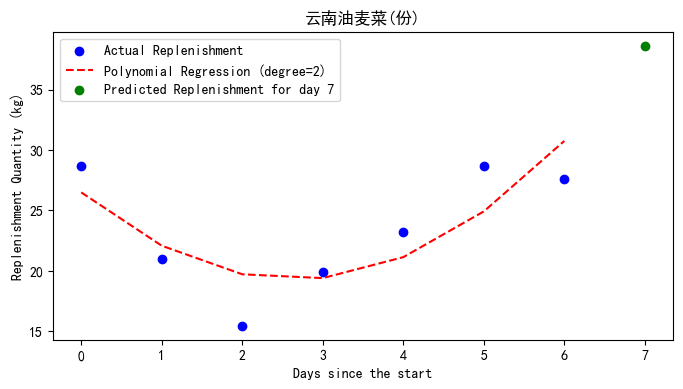

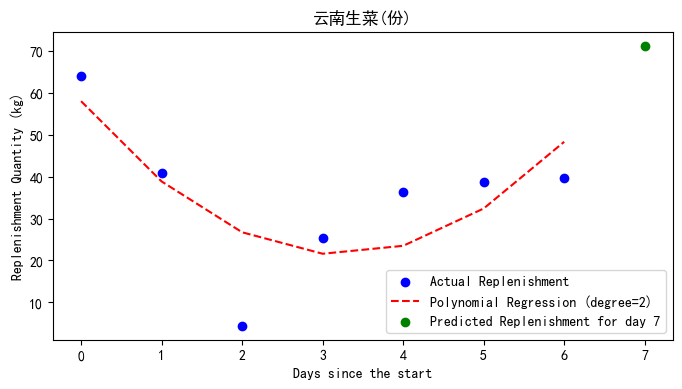

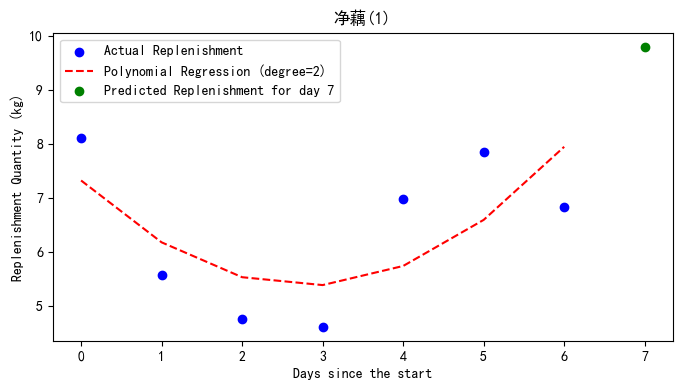

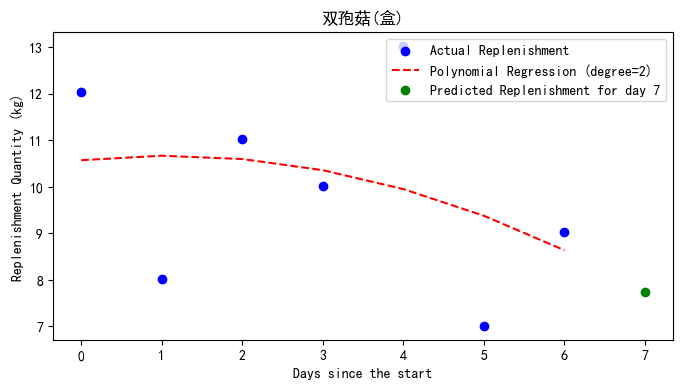

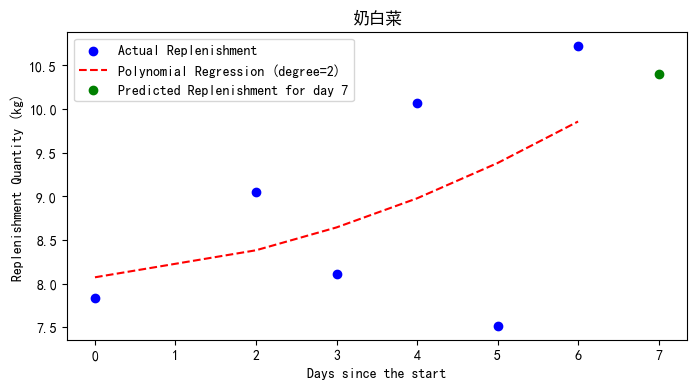

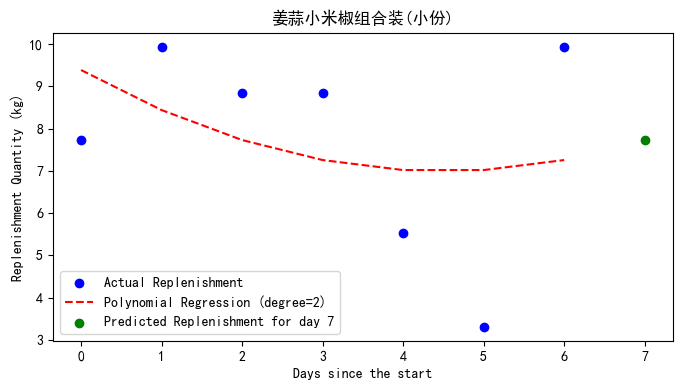

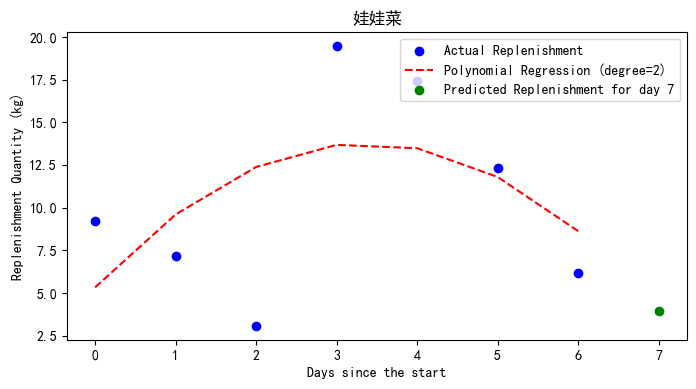

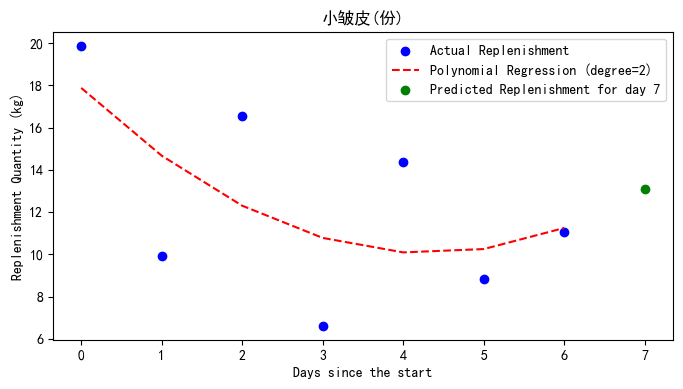

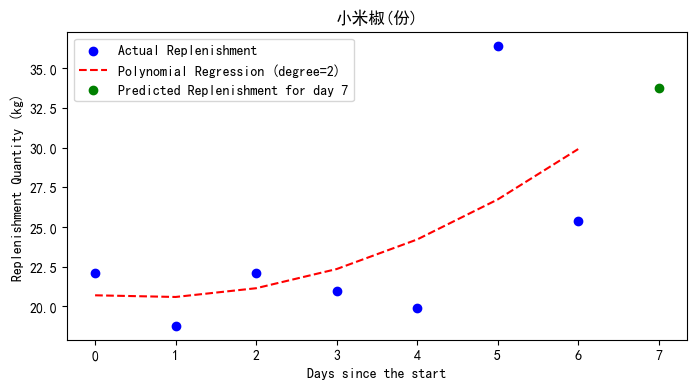

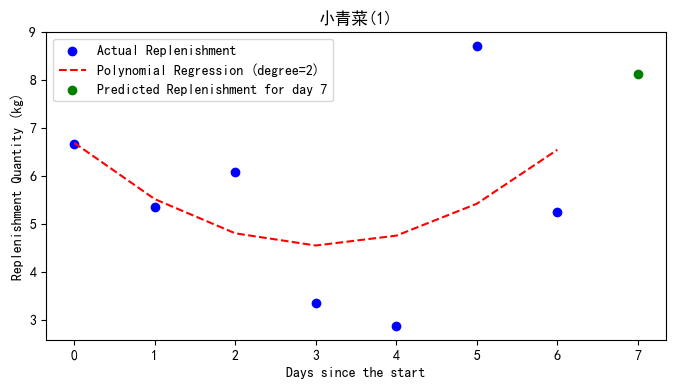

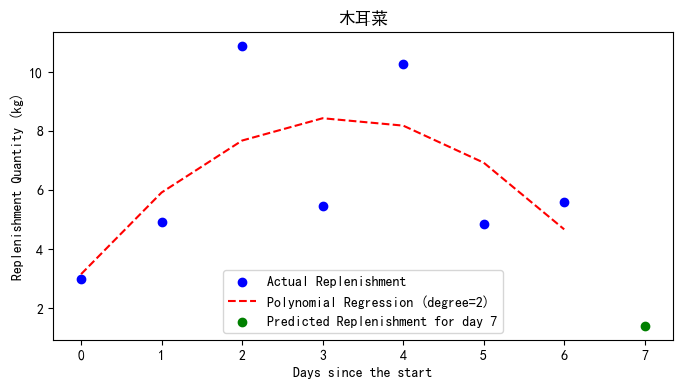

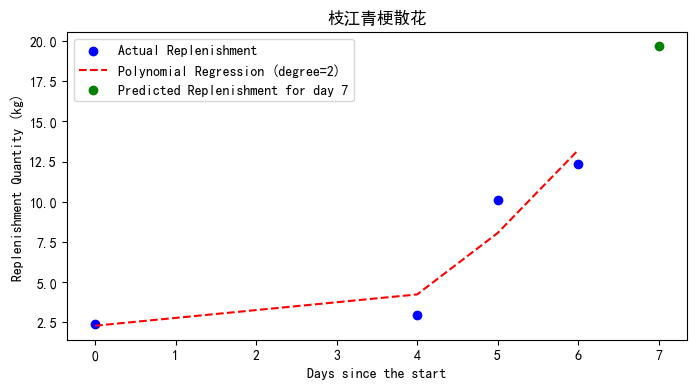

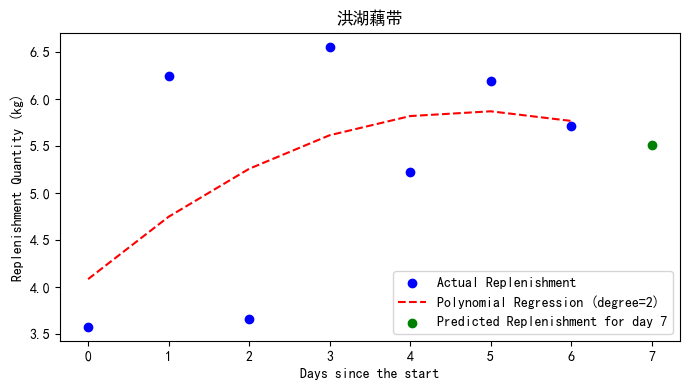

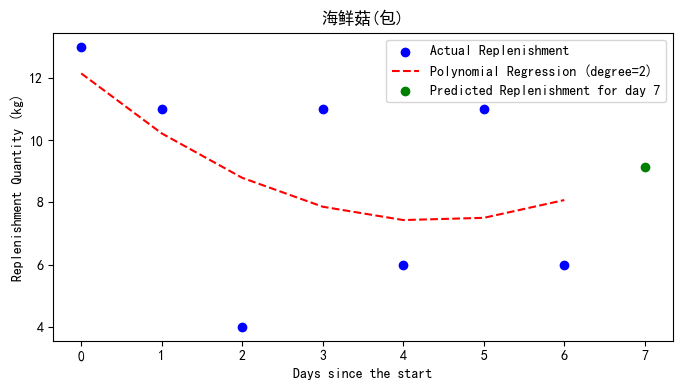

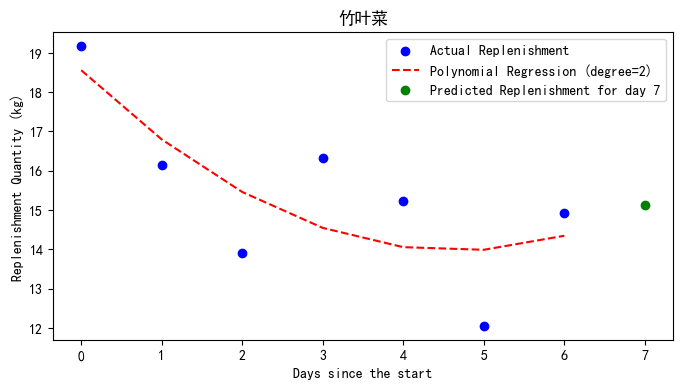

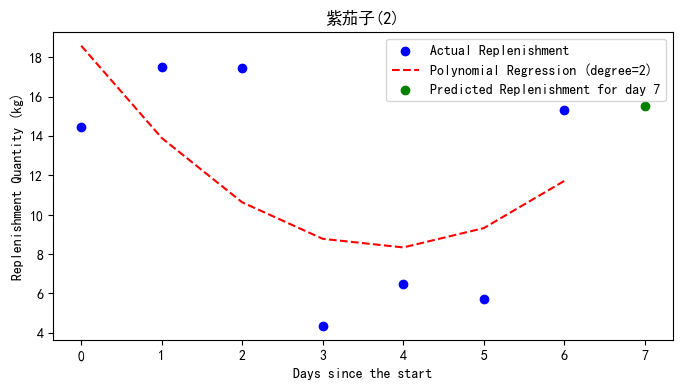

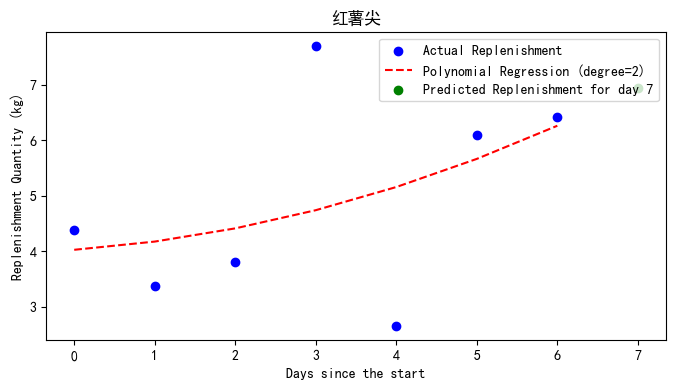

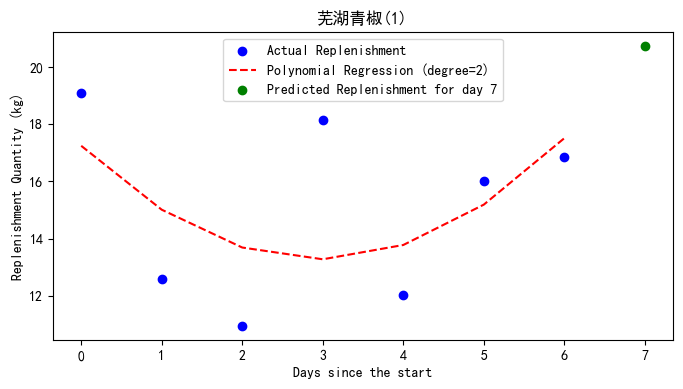

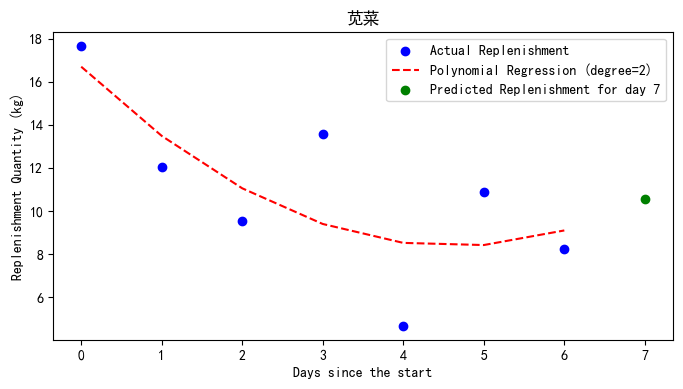

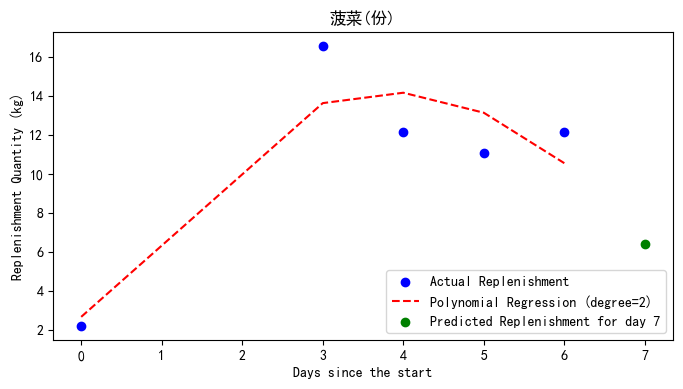

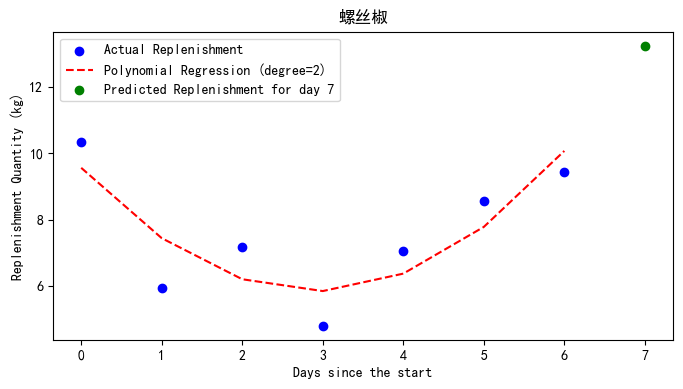

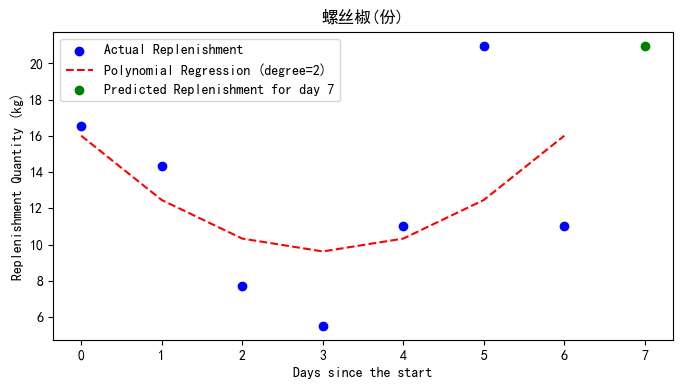

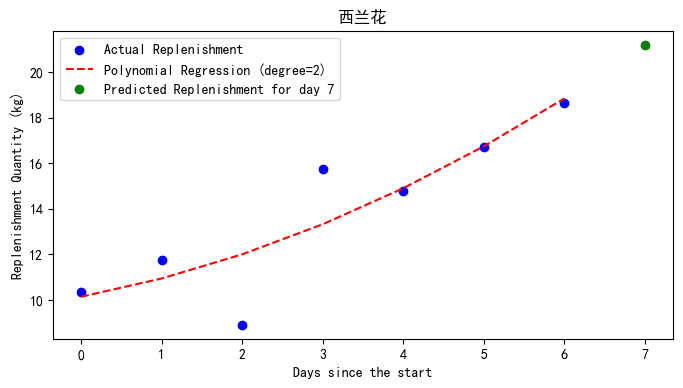

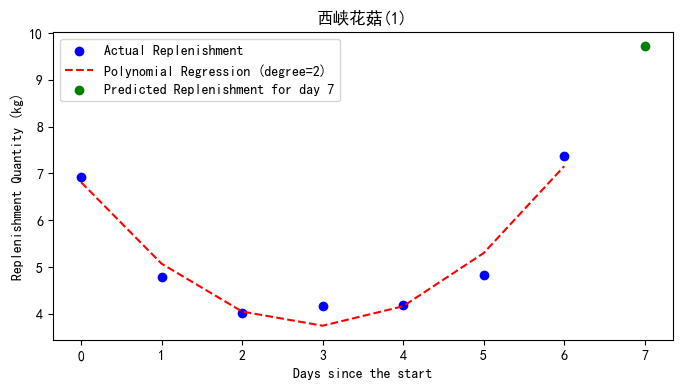

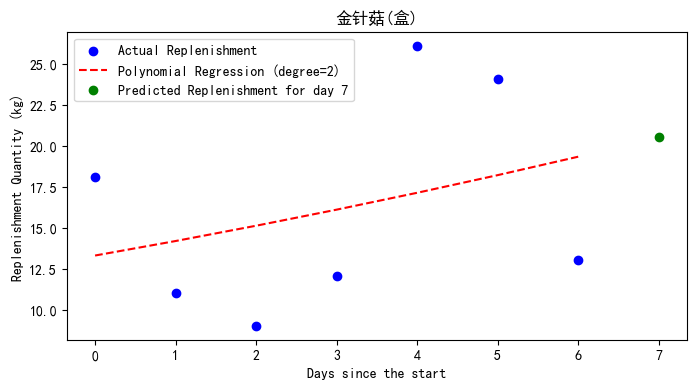

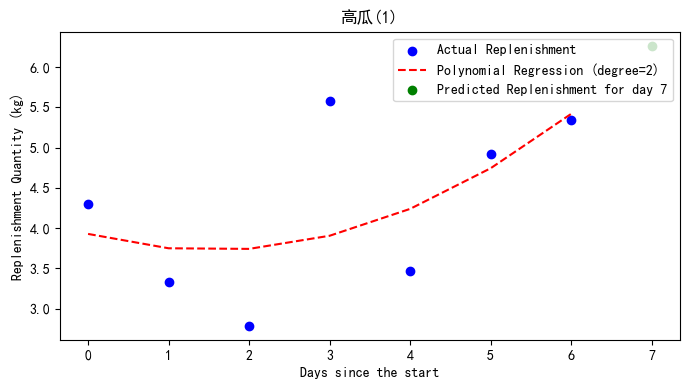

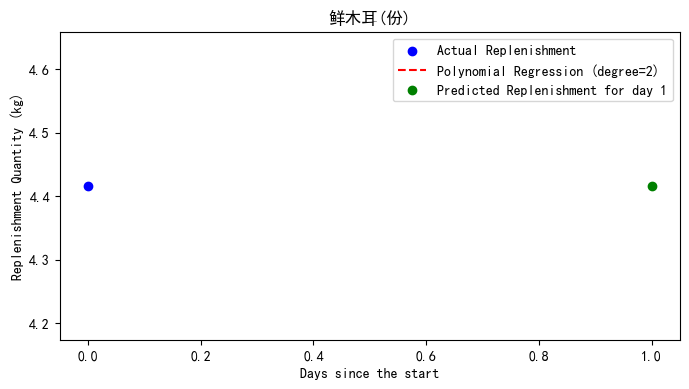

In [13]:
predicted_values = predict_replenishment_for_all_products(merged_daily_stats, degree=2, future_days=1)

In [14]:
predicted_values

{'云南油麦菜(份)': 38.644142652092306,
 '云南生菜(份)': 71.29449991324782,
 '净藕(1)': 9.79371464867971,
 '双孢菇(盒)': 7.729745204695104,
 '奶白菜': 10.404733667660613,
 '姜蒜小米椒组合装(小份)': 7.728828530418459,
 '娃娃菜': 3.955232626274464,
 '小皱皮(份)': 13.091689143361869,
 '小米椒(份)': 33.7544756226439,
 '小青菜(1)': 8.125348500055754,
 '木耳菜': 1.4132636494364172,
 '枝江青梗散花': 19.70439862638863,
 '洪湖藕带': 5.513025486692373,
 '海鲜菇(包)': 9.142857142857139,
 '竹叶菜': 15.126682763867283,
 '紫茄子(2)': 15.531018539641941,
 '红薯尖': 6.949427510685428,
 '芜湖青椒(1)': 20.724738675958193,
 '苋菜': 10.551055473735879,
 '菠菜(份)': 6.395913271415996,
 '螺丝椒': 13.239653910996593,
 '螺丝椒(份)': 20.978248868278683,
 '西兰花': 21.19934506753991,
 '西峡花菇(1)': 9.728859705317104,
 '金针菇(盒)': 20.52091554853987,
 '高瓜(1)': 6.263705199394245,
 '鲜木耳(份)': 4.4164734459534065}

In [17]:
keys = list(predicted_values.keys())
values = list(predicted_values.values())
predicted_values_df = pd.DataFrame({'Item': keys, 'PredictedValue': values})


In [21]:
with pd.ExcelWriter("E:\\数学建模国赛2023选题\\C题\\第三题建模预测销量约束参数.xlsx") as writer:
    predicted_values_df.to_excel(writer, sheet_name='预测销量', index=False)